In [1]:
import pickle

import lmfit
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def normalize(xs, ys, zs):
    zout = np.array(zs)
    params = lmfit.Parameters()
    params.add("piston", value=0.0)
    params.add("tip", value=0.0)
    params.add("tilt", value=0.0)

    def resid(params, arr, idx):
        vd = params.valuesdict()
        model = vd['piston'] + vd['tip']*arr['xs'] + vd['tilt']*arr['ys']
        return arr['zs'][:,idx] - model

    result = lmfit.minimize(resid, params, args=(arr, 4))    
    zout[:, 4] = result.residual

    # Hold piston const = 0 for Z5 and Z6
    params['piston'].vary = False

    result = lmfit.minimize(resid, params, args=(arr, 5))
    zout[:, 5] = result.residual
    result = lmfit.minimize(resid, params, args=(arr, 6))
    zout[:, 6] = result.residual

    # Only let piston vary for Z7, Z8
    params['piston'].vary = True
    params['tip'].vary = False
    params['tilt'].vary = False
    
    result = lmfit.minimize(resid, params, args=(arr, 7))
    zout[:, 7] = result.residual
    result = lmfit.minimize(resid, params, args=(arr, 8))
    zout[:, 8] = result.residual

    # Correct second astig, second coma, spherical the same way?
    params['piston'].vary = True
    params['tip'].vary = True
    params['tilt'].vary = True
    result = lmfit.minimize(resid, params, args=(arr, 11))
    zout[:, 11] = result.residual    

    params['piston'].vary = False
    params['tip'].vary = True
    params['tilt'].vary = True
    result = lmfit.minimize(resid, params, args=(arr, 12))
    zout[:, 12] = result.residual
    result = lmfit.minimize(resid, params, args=(arr, 13))
    zout[:, 13] = result.residual    
    
    params['piston'].vary = True
    params['tip'].vary = False
    params['tilt'].vary = False
    result = lmfit.minimize(resid, params, args=(arr, 16))
    zout[:, 16] = result.residual
    result = lmfit.minimize(resid, params, args=(arr, 17))
    zout[:, 17] = result.residual    

    return zout

In [81]:
with open("output/s2.pkl", 'rb') as f:
    arr = pickle.load(f)

In [82]:
newZs = normalize(arr['xs'], arr['ys'], arr['zs'])

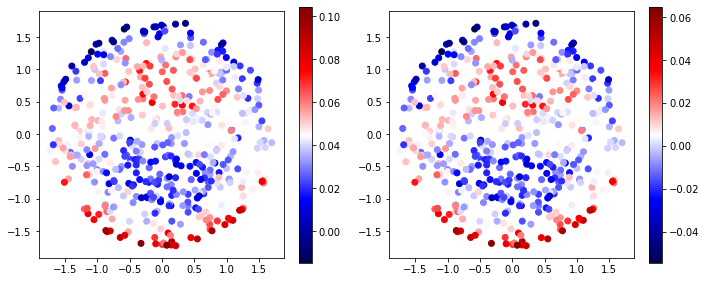

In [83]:
j = 17

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
s0 = axes[0].scatter(arr['xs'], arr['ys'], c=arr['zs'][:, j], cmap='seismic')
plt.colorbar(s0, ax=axes[0])
s1 = axes[1].scatter(arr['xs'], arr['ys'], c=newZs[:, j], cmap='seismic')
plt.colorbar(s1, ax=axes[1])
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
fig.tight_layout()

In [84]:
xs = []
ys = []
zs = []
normed = []
for i in range(1, 50):
    with open(f"output/s{i}.pkl", 'rb') as f:
        arr = pickle.load(f)
        xs.append(arr['xs'])
        ys.append(arr['ys'])
        zs.append(arr['zs'])        
        normed.append(normalize(arr['xs'], arr['ys'], arr['zs']))
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
normed = np.array(normed)

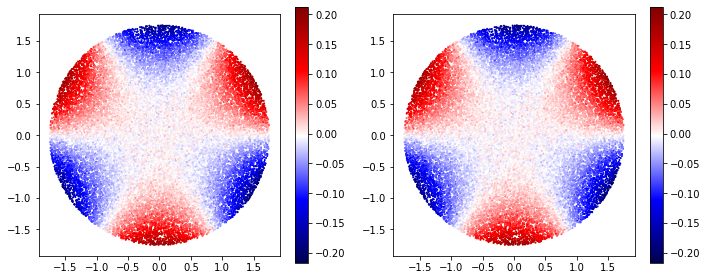

In [98]:
j = 9

fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
s0 = axes[0].scatter(xs, ys, c=zs[..., j], cmap='seismic', s=1)
plt.colorbar(s0, ax=axes[0])
s1 = axes[1].scatter(xs, ys, c=normed[..., j], cmap='seismic', s=1)
plt.colorbar(s1, ax=axes[1])
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
fig.tight_layout()